# Predicting Advertisement Clicks using Logistic Regression, SVC and Random Forest Model

The objective of this project is to use the dataset to train our model and predict whether the user will click on the advertisement or not based on various features of the users. We will decide which features are to be used after looking at the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Import and Fetch Information about our dataset and its features**

In [2]:
ad_data = pd.read_csv('advertising.csv')

ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
ad_data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [6]:
ad_data.duplicated().sum()

0

Now, we will feature engineer the Timestamp feature which will enable us to visualize ad click data on various timeframes

In [7]:
ad_data['Timestamp'] = pd.to_datetime(ad_data['Timestamp'])

ad_data['Year'] = ad_data['Timestamp'].dt.year
ad_data['Month'] = ad_data['Timestamp'].dt.month
ad_data['Weekday'] = ad_data['Timestamp'].dt.dayofweek
ad_data['Day of week'] = ad_data['Timestamp'].dt.day_name()
ad_data['Day'] = ad_data['Timestamp'].dt.day
ad_data['Hour'] = ad_data['Timestamp'].dt.hour

ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Year,Month,Weekday,Day of week,Day,Hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016,3,6,Sunday,27,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016,4,0,Monday,4,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016,3,6,Sunday,13,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016,1,6,Sunday,10,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016,6,4,Friday,3,3


**Visualising the Dataset to know more about the distribution of values across various features**

Text(0.5, 1.0, 'The percentage of Clicked on Ad')

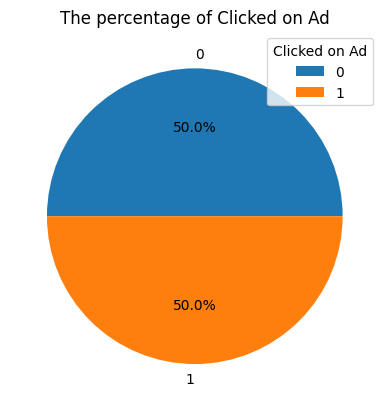

In [8]:
click = ad_data['Clicked on Ad'].value_counts()

plt.pie(click, labels = click.index, autopct="%1.1f%%")

plt.legend(title = 'Clicked on Ad')
plt.title('The percentage of Clicked on Ad')

<Axes: xlabel='Age', ylabel='Count'>

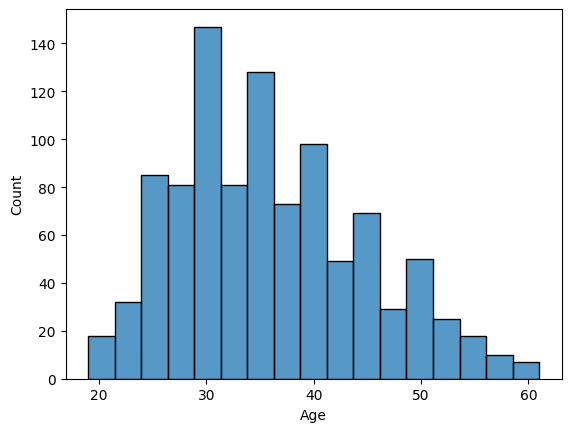

In [9]:
#Age wise ditribution on a histogram of all the users

sns.histplot(data = ad_data, x='Age')

<Axes: xlabel='Age', ylabel='Count'>

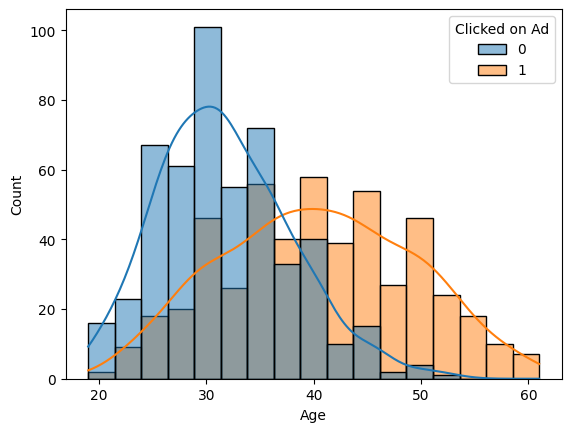

In [10]:
#Age wise distribution along with whether they click on Ad on not
sns.histplot(data = ad_data, 
             x= 'Age', 
             hue = 'Clicked on Ad', 
             kde = True)

#Here we can see that the age has some correlation with the clicked on ad value

<Axes: xlabel='Area Income', ylabel='Count'>

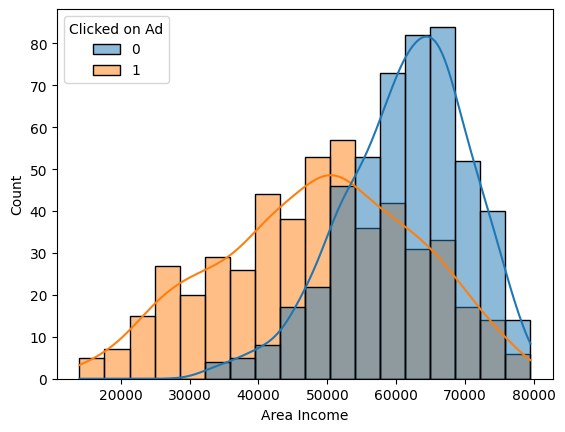

In [11]:
#Area Income wise distribution along with the Click on Ad action
sns.histplot(data = ad_data, 
             x = 'Area Income',
             hue = 'Clicked on Ad',
             kde = True)

#Here as well we can see that Area Income has some correlation with the Clicked on Ad value

<Axes: xlabel='Daily Time Spent on Site', ylabel='Count'>

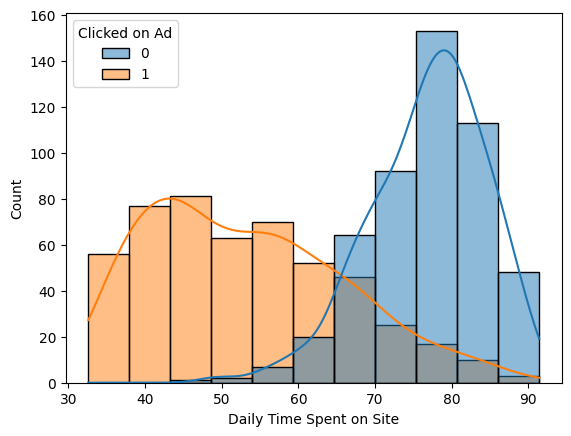

In [12]:
#Daily Time Spent on Site(minutes) distribution along with whether they click on ad or not
sns.histplot(data = ad_data, 
             x = 'Daily Time Spent on Site',
             hue = 'Clicked on Ad',
             kde = True)

#Here we see some correlation between Click on ad value and Daily Time Spent, there this is an important feature

<Axes: xlabel='Daily Internet Usage', ylabel='Count'>

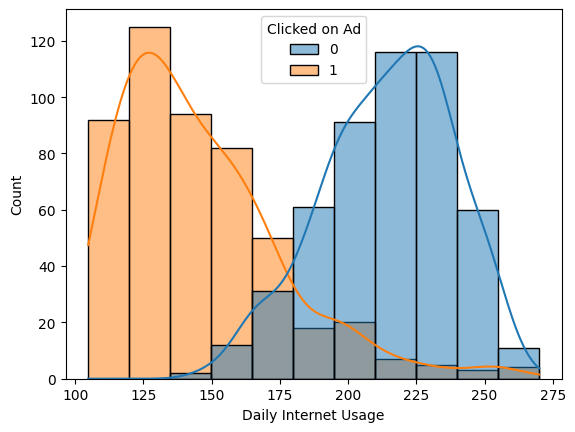

In [13]:
sns.histplot(data = ad_data,
             x = 'Daily Internet Usage',
             hue = 'Clicked on Ad',
             kde = True)

#There is good enough correlation, therefore this is also an important feature

Text(0.5, 1.0, 'Distribution of Clicked on Ad by Day of week')

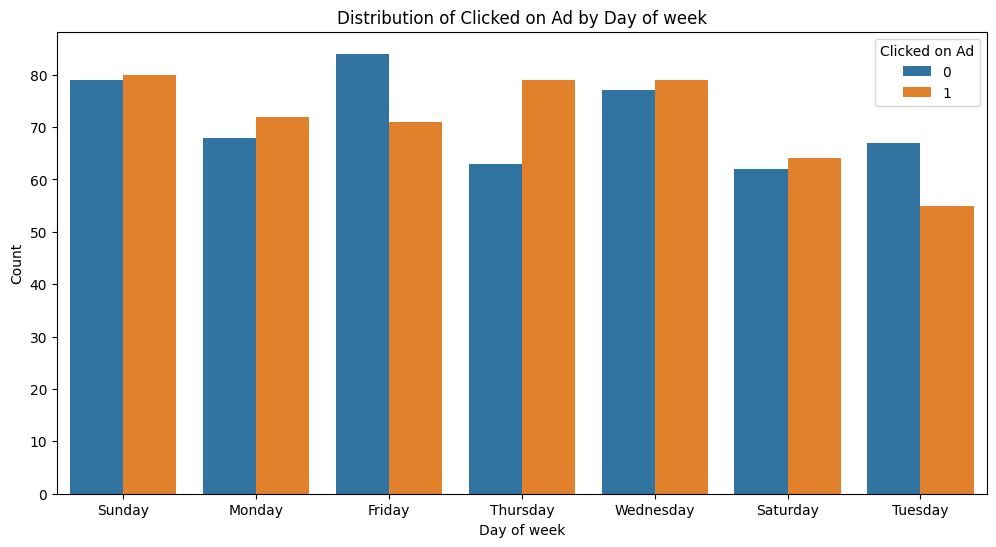

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(data = ad_data, x = 'Day of week', 
              hue = 'Clicked on Ad')

plt.xlabel('Day of week')
plt.ylabel('Count')
plt.title('Distribution of Clicked on Ad by Day of week')


<Axes: xlabel='Day of week', ylabel='Count'>

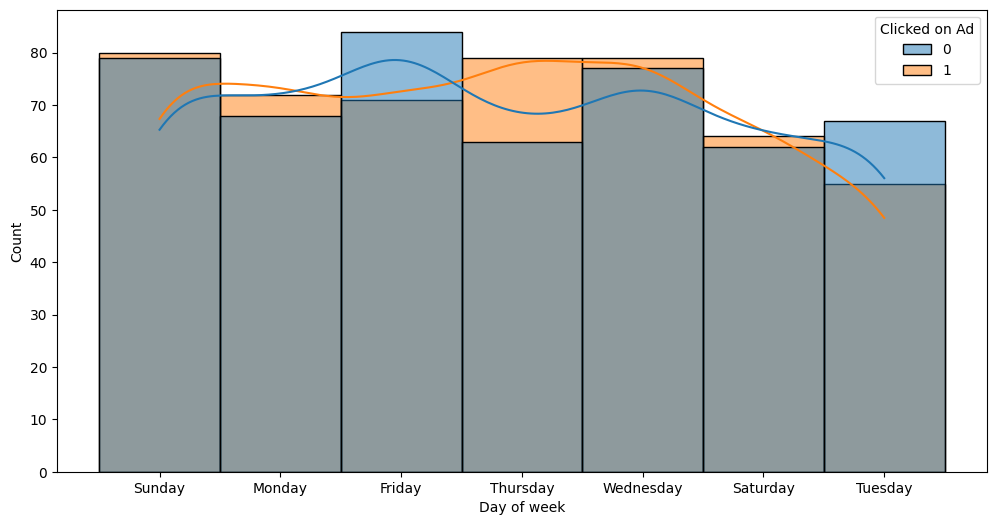

In [15]:
plt.figure(figsize=(12,6))

sns.histplot(data = ad_data, x = 'Day of week', 
             hue = 'Clicked on Ad', kde = True)

#here we see that the Day of week has no relation whatsoever on the value on Clicked on Ad, therefore we can leave this feature


Text(0.5, 1.0, 'Distribution of Clicked on Ad by Day')

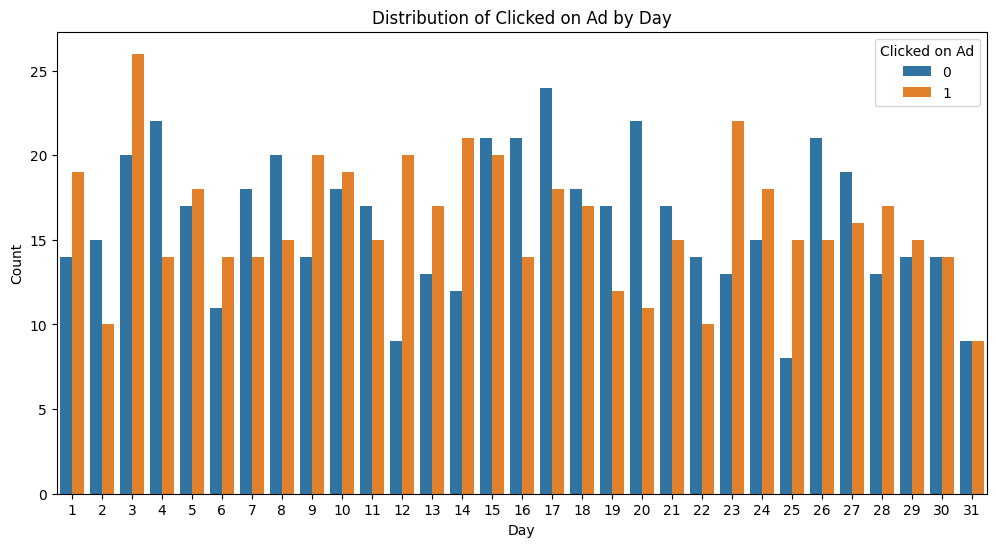

In [16]:
plt.figure(figsize=(12,6))

sns.countplot(data = ad_data, x = 'Day', hue = 'Clicked on Ad')

plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Distribution of Clicked on Ad by Day')

<Axes: xlabel='Day', ylabel='Count'>

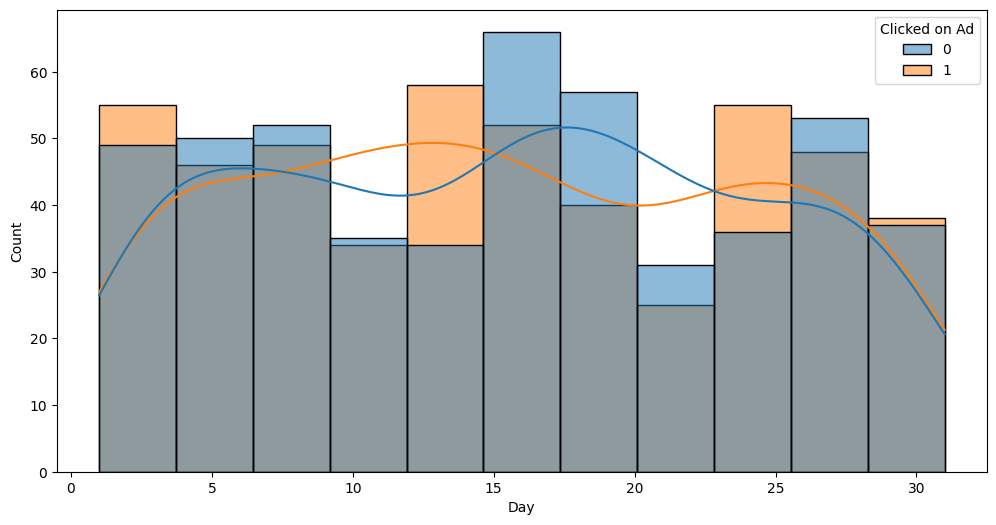

In [17]:
plt.figure(figsize=(12,6))

sns.histplot(data = ad_data, x = 'Day', hue = 'Clicked on Ad',
            kde = True)

#here as well, there is no obvious relation between the Day and clicked on ad value, therefore we wouldn't consider this too

Text(0.5, 1.0, 'Distribution of Clicked on Ad by Month')

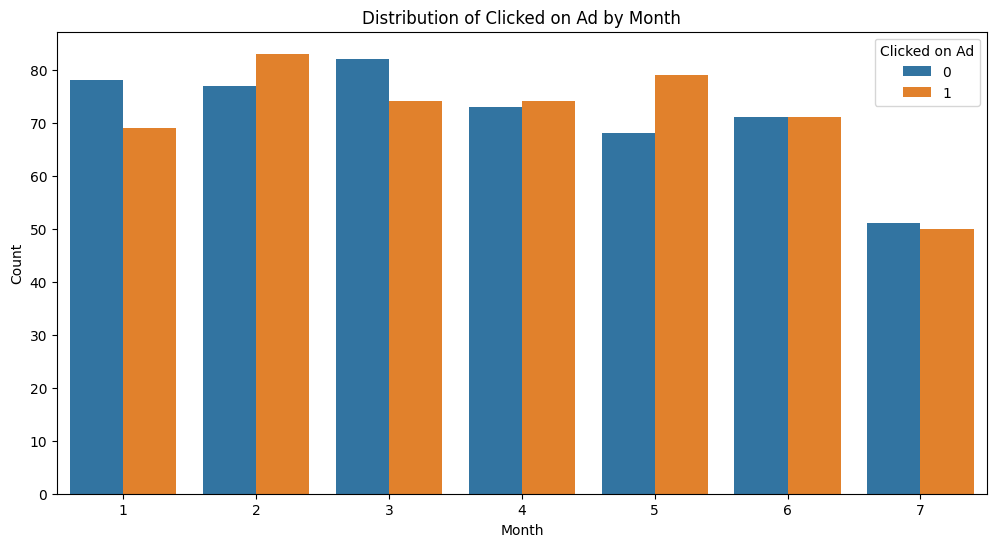

In [18]:
plt.figure(figsize=(12,6))

sns.countplot(data = ad_data, x='Month', hue = 'Clicked on Ad')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of Clicked on Ad by Month')

<Axes: xlabel='Month', ylabel='Count'>

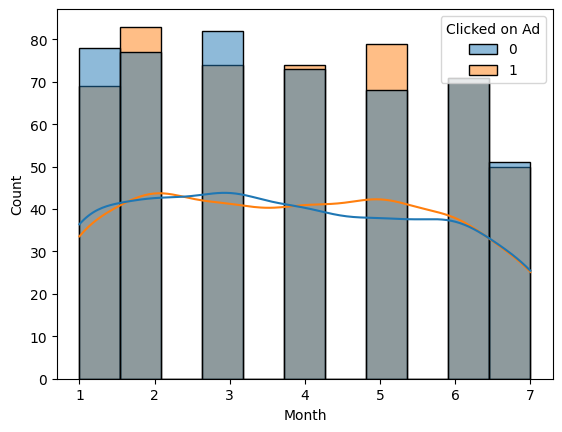

In [19]:
sns.histplot(data = ad_data, x = 'Month', hue = 'Clicked on Ad',
            kde = True)

#Again, no relation with month as well

Text(0.5, 1.0, 'Distribution of Clicked on Ad by Hour')

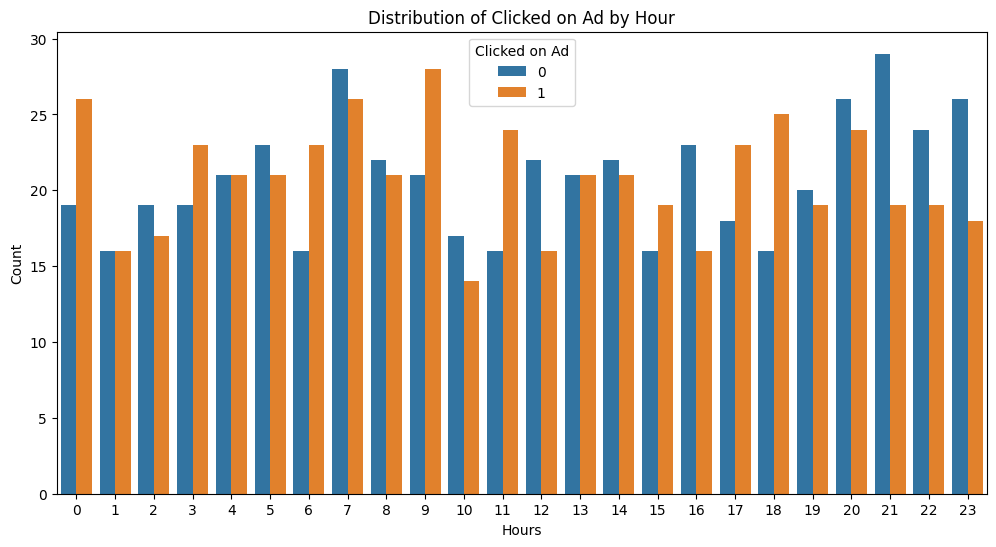

In [20]:
plt.figure(figsize=(12,6))

sns.countplot(x='Hour', hue='Clicked on Ad', data=ad_data)

plt.xlabel('Hours')
plt.ylabel('Count')
plt.title('Distribution of Clicked on Ad by Hour')

<Axes: xlabel='Hour', ylabel='Count'>

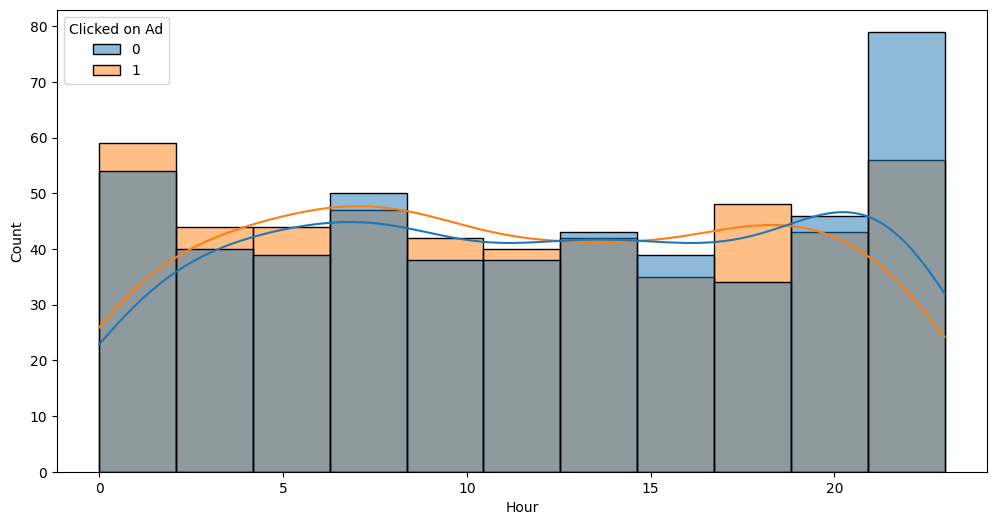

In [21]:
plt.figure(figsize=(12,6))

sns.histplot(data = ad_data,x = 'Hour', hue = 'Clicked on Ad',kde = True)

#same for this as well, no relation therefore we'll drop this

Text(0.5, 1.0, 'Distribution of Clicked on Ad by Gender')

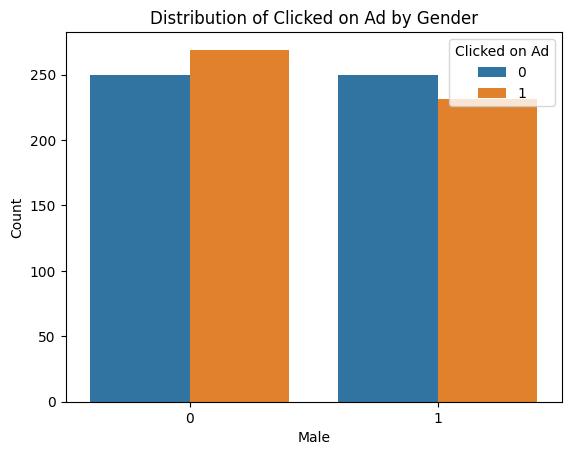

In [22]:
sns.countplot(x='Male', hue='Clicked on Ad', data=ad_data)

plt.xlabel('Male')
plt.ylabel('Count')
plt.title('Distribution of Clicked on Ad by Gender')

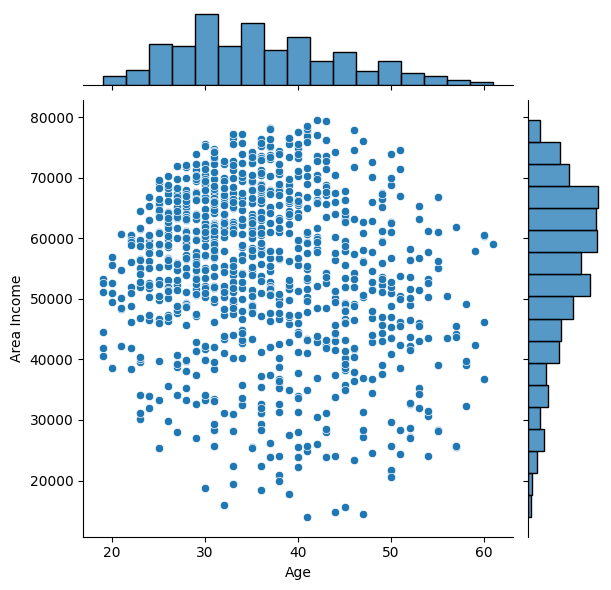

In [23]:
#jointplot to see the relationship between area income and age

sns.jointplot(x = 'Age', y = 'Area Income', data = ad_data)

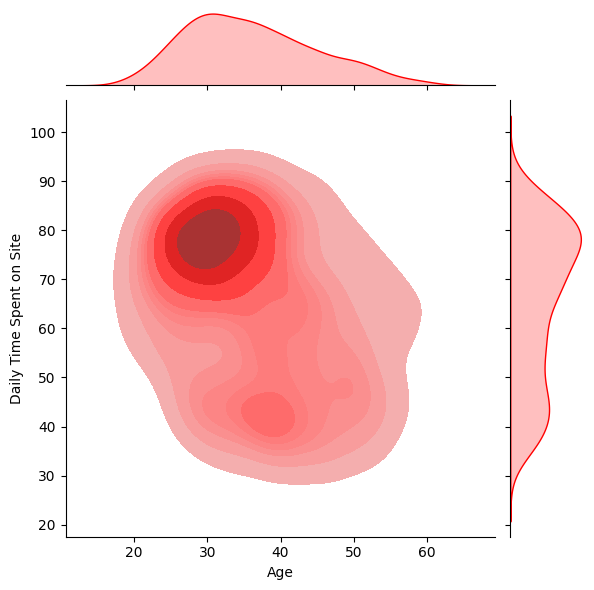

In [24]:
#jointplot to see the relationship between how much time users of various ages spend on our site

sns.jointplot(x='Age', y='Daily Time Spent on Site', data = ad_data,
             color = 'red', kind = 'kde', fill = True)

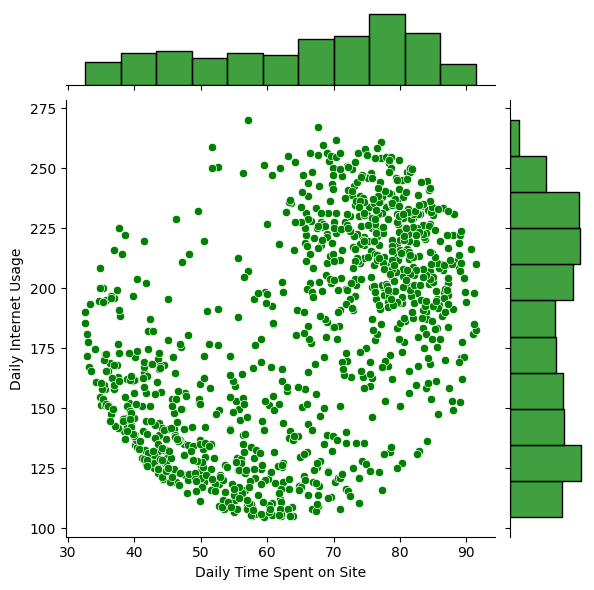

In [25]:
#jointplot to see distribution of daily time spent on site and daily internet usage

sns.jointplot(x='Daily Time Spent on Site',
              y='Daily Internet Usage',
              data=ad_data,color='green')

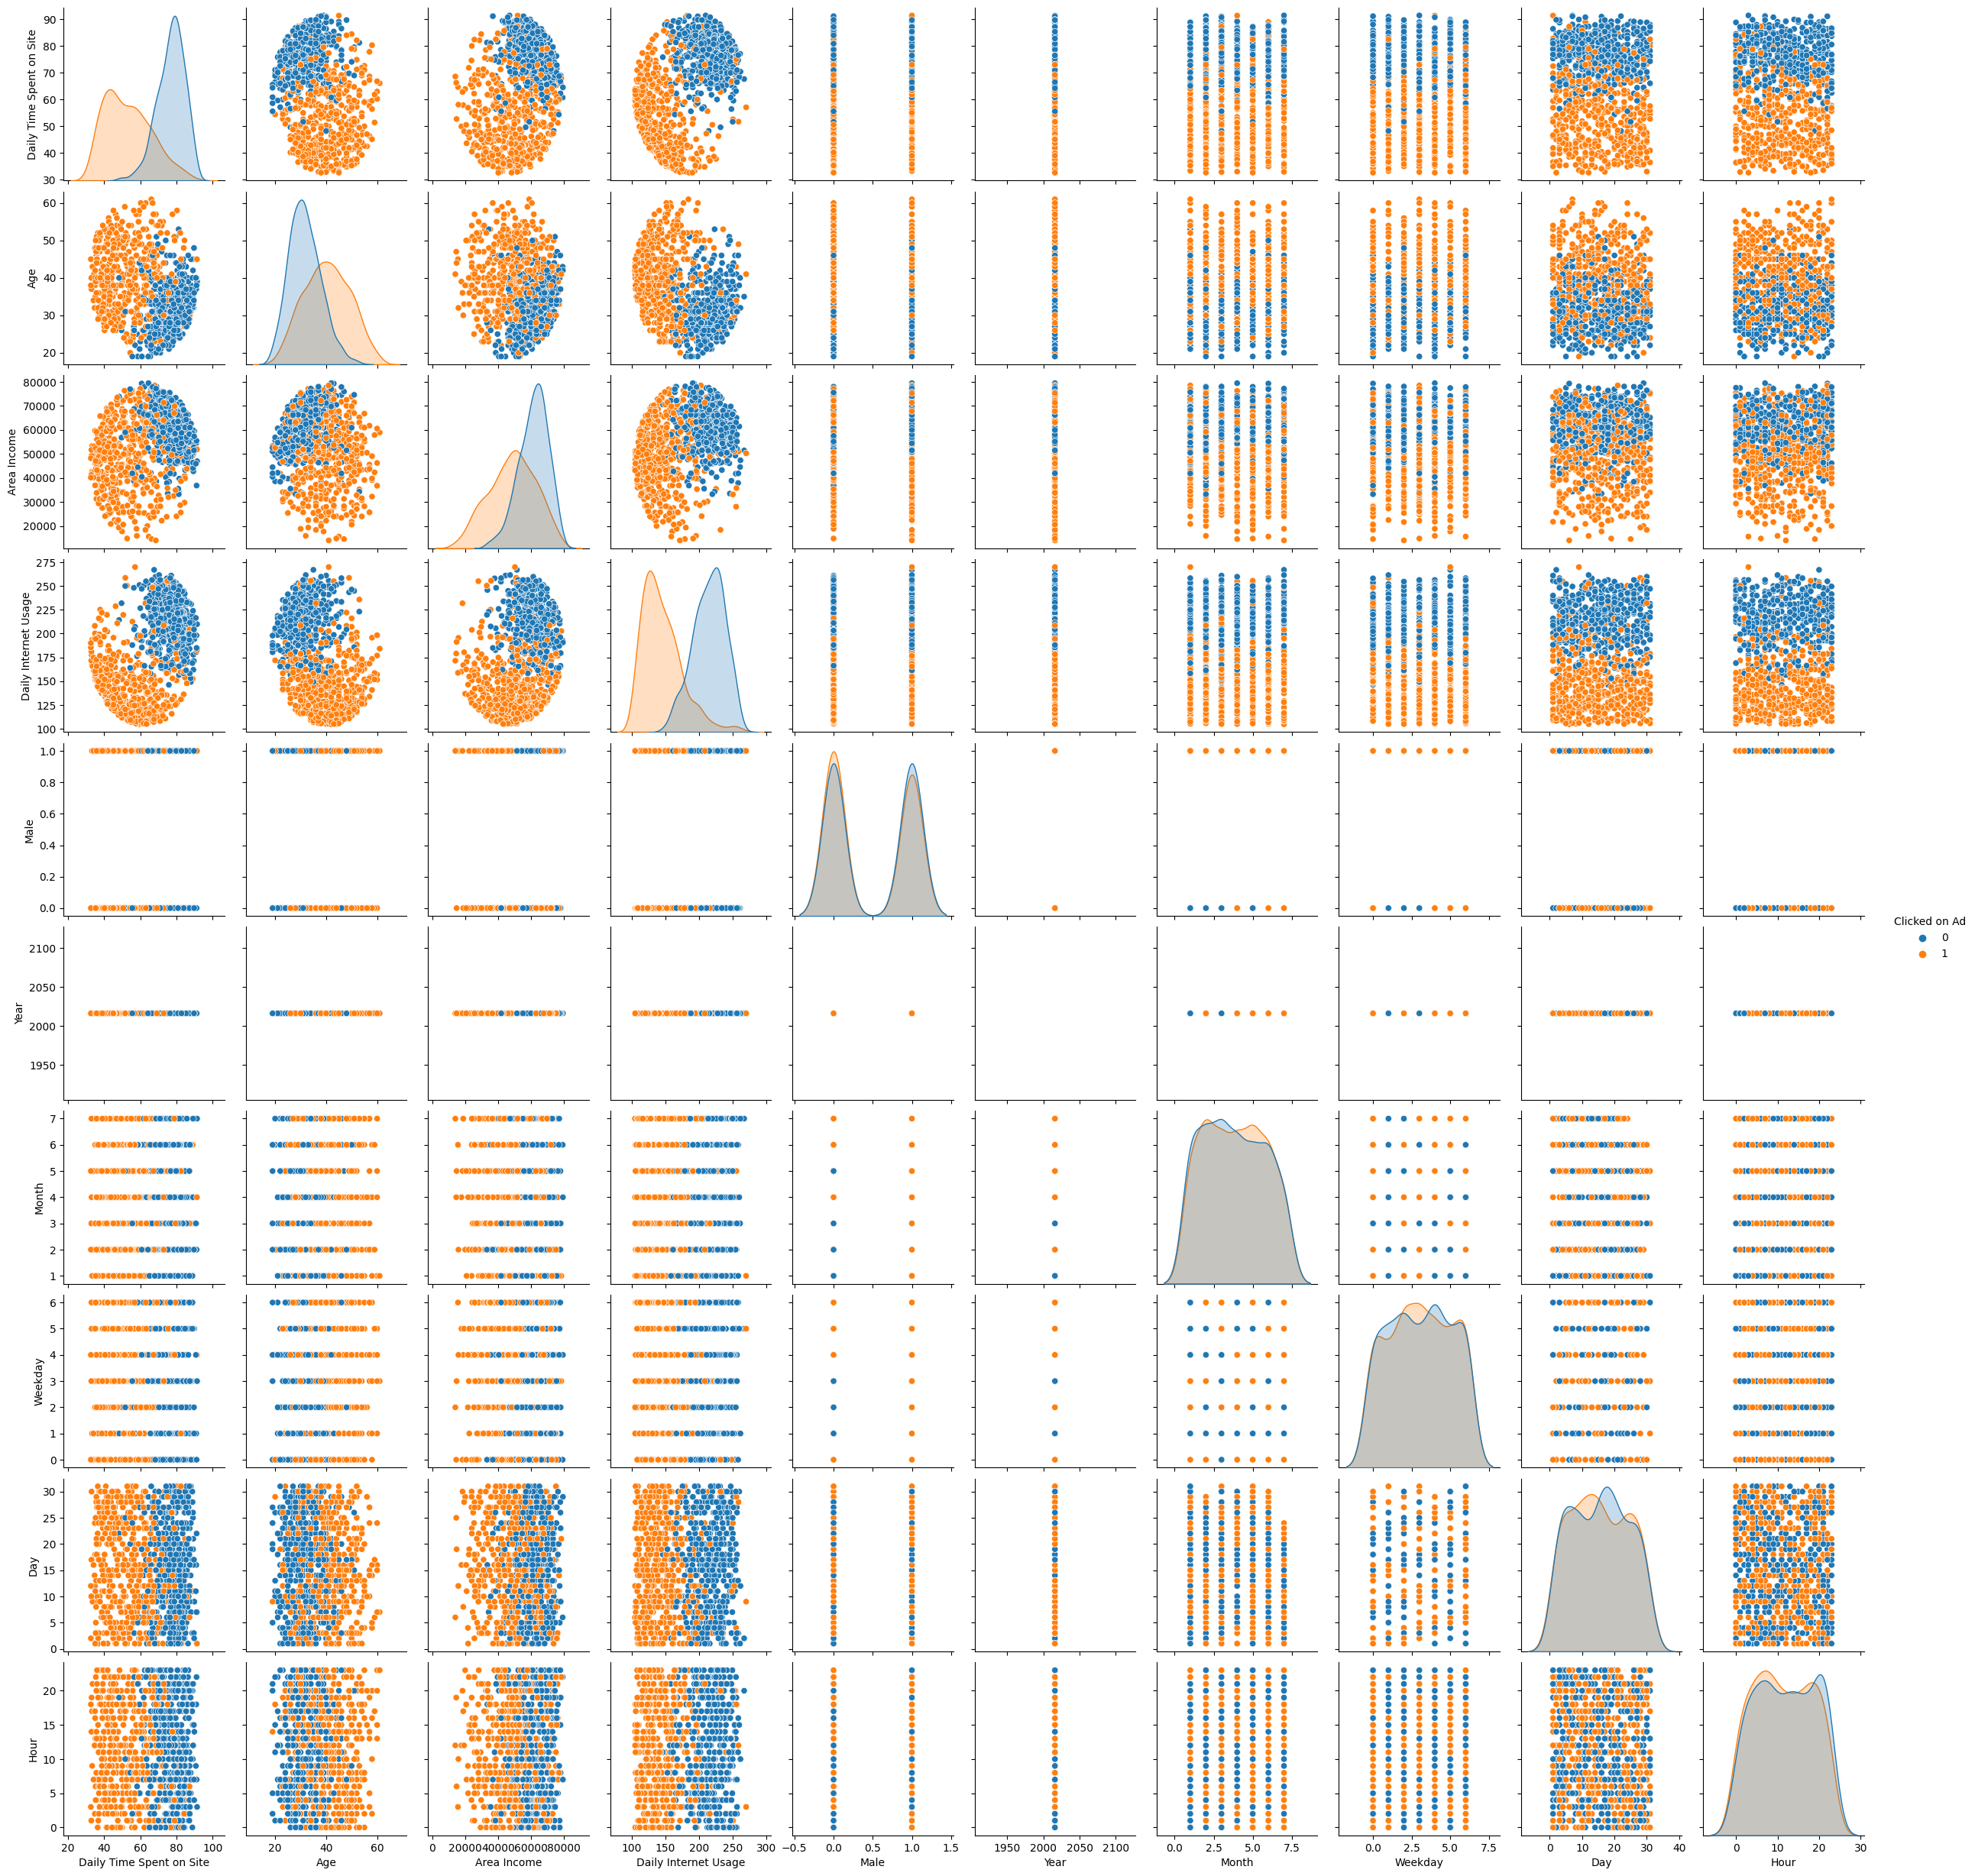

In [51]:
sns.pairplot(ad_data, hue = 'Clicked on Ad')

In [27]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Year', 'Month', 'Weekday', 'Day of week',
       'Day', 'Hour'],
      dtype='object')

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


              precision    recall  f1-score   support

           0       0.90      0.93      0.92        89
           1       0.94      0.92      0.93       111

    accuracy                           0.93       200
   macro avg       0.92      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200



<Axes: >

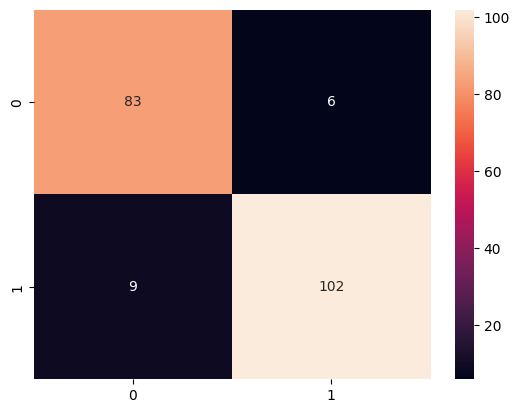

In [52]:
#Logistic Regression based on just internet usages and session duration
X = ad_data[['Daily Time Spent on Site', 'Daily Internet Usage']]

y = ad_data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LogisticRegression()

model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt = 'd')

              precision    recall  f1-score   support

           0       0.84      0.96      0.89        89
           1       0.96      0.86      0.90       111

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200



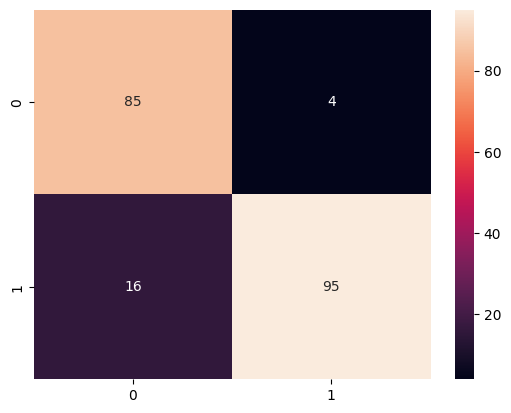

In [53]:
#Logistic Regression all Five Important Features
X = ad_data[['Daily Time Spent on Site','Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d');

              precision    recall  f1-score   support

           0       0.88      0.93      0.91        89
           1       0.94      0.90      0.92       111

    accuracy                           0.92       200
   macro avg       0.91      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200



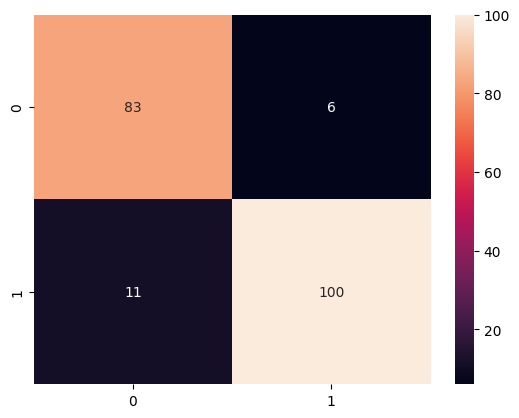

In [34]:
#Support Vector Classifier on just internet usage and session duration
from sklearn.svm import SVC
X = ad_data[['Daily Time Spent on Site',  'Daily Internet Usage']]
y = ad_data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d');

              precision    recall  f1-score   support

           0       0.60      0.84      0.70        89
           1       0.81      0.55      0.66       111

    accuracy                           0.68       200
   macro avg       0.71      0.70      0.68       200
weighted avg       0.72      0.68      0.68       200



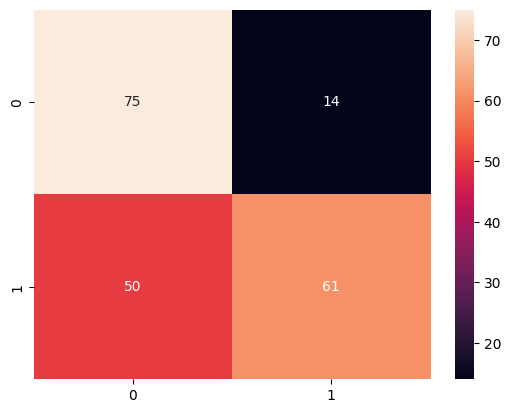

In [35]:
#SVC on all five features
X = ad_data[['Daily Time Spent on Site','Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d');

**Pipeline**

In [36]:
from sklearn.preprocessing import StandardScaler
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
encoder = BinaryEncoder()

#standardisation
preprocessor = ColumnTransformer([
    ('scaler', scaler, ['Daily Time Spent on Site','Age', 'Area Income', 'Daily Internet Usage', 'Male']),
    ('encoder', encoder, ['Country'])
])

X = ad_data[['Daily Time Spent on Site','Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Country']]
y = ad_data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

In [37]:
X_train_prep

array([[ 0.68151885, -1.59171433, -0.6639286 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.85377694, -0.45872077,  1.11780512, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.52246303,  0.22107537,  0.90246998, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 1.64654135,  1.01417086, -0.23476995, ...,  1.        ,
         1.        ,  0.        ],
       [-0.53560399,  0.67427279,  1.31753347, ...,  0.        ,
         1.        ,  1.        ],
       [ 1.5547542 ,  0.44767408,  0.33886526, ...,  0.        ,
         1.        ,  1.        ]])

In [38]:
x=pd.DataFrame(X_train_prep)

In [39]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.681519,-1.591714,-0.663929,0.645655,-0.955968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.853777,-0.458721,1.117805,0.604556,1.046060,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.522463,0.221075,0.902470,1.431327,-0.955968,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.910987,-0.911918,0.262802,1.033125,-0.955968,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.003970,1.127470,-0.437674,-1.505639,-0.955968,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.443249,-1.251816,-0.635673,1.358262,1.046060,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
796,-1.300707,1.920566,0.601015,-0.309207,1.046060,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
797,1.646541,1.014171,-0.234770,0.025291,1.046060,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
798,-0.535604,0.674273,1.317533,-0.961765,-0.955968,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0


<Axes: xlabel='1', ylabel='Count'>

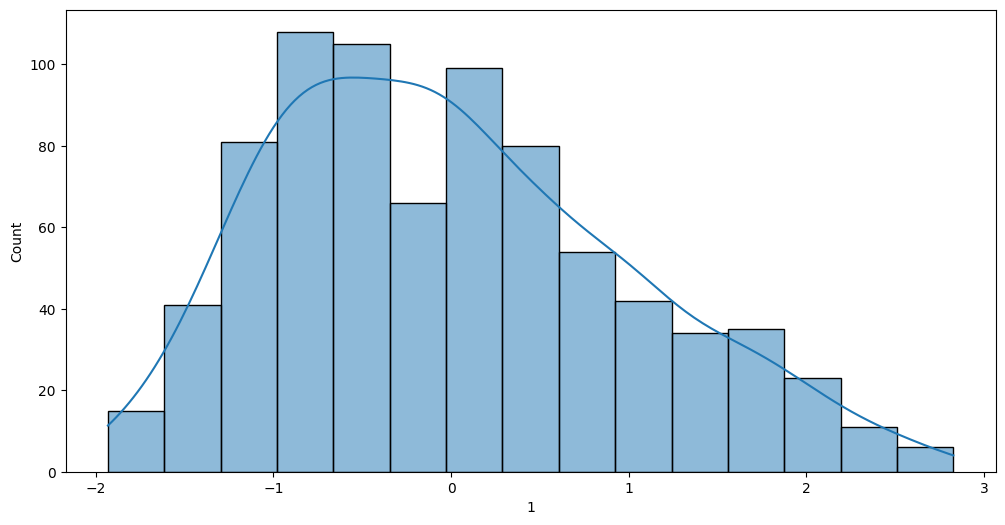

In [40]:
plt.figure(figsize=(12,6))

sns.histplot(data = x,x = 1,kde = True)
#training set after standardisation 

In [41]:
for model in [LogisticRegression(), SVC()]:
    model.fit(X_train_prep, y_train)
    predictions = model.predict(X_test_prep)
    print('Training Accuracy:', model.score(X_train_prep, y_train))
    print(classification_report(y_test, predictions))

Training Accuracy: 0.975
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        89
           1       0.98      0.95      0.96       111

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

Training Accuracy: 0.985
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        89
           1       0.98      0.93      0.95       111

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [42]:
# Tuning the model
for C in [0.01, 0.1, 1, 10, 100]:
    log_reg = LogisticRegression(C=C)
    log_reg.fit(X_train_prep, y_train)
    predictions = log_reg.predict(X_test_prep)
    print('C:', C)
    print(classification_report(y_test, predictions))

C: 0.01
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        89
           1       0.98      0.89      0.93       111

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.94      0.93      0.93       200

C: 0.1
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        89
           1       0.98      0.92      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200

C: 1
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        89
           1       0.98      0.95      0.96       111

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200


In [43]:
for C in [0.01, 0.1, 1, 10, 100]:
    
    svc = SVC(C=C)
    svc.fit(X_train_prep, y_train)
    predictions = svc.predict(X_test_prep)
    print('C:', C)
    print(classification_report(y_test, predictions))

C: 0.01
              precision    recall  f1-score   support

           0       0.85      0.99      0.91        89
           1       0.99      0.86      0.92       111

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.93      0.92      0.92       200

C: 0.1
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        89
           1       0.98      0.93      0.95       111

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

C: 1
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        89
           1       0.98      0.93      0.95       111

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200


In [44]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    svc = SVC(C=0.1, kernel=kernel)
    svc.fit(X_train_prep, y_train)
    predictions = svc.predict(X_test_prep)
    print('kernel:', kernel)
    print(classification_report(y_test, predictions))

kernel: linear
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        89
           1       0.98      0.95      0.97       111

    accuracy                           0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200

kernel: poly
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        89
           1       0.98      0.90      0.94       111

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200

kernel: rbf
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        89
           1       0.98      0.93      0.95       111

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95 

Training Accuracy: 0.9725
Testing Accuracy: 0.95


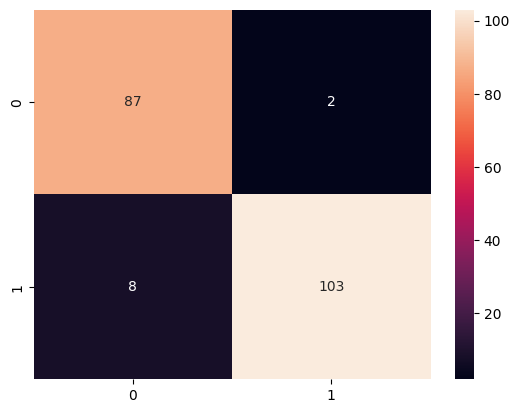

In [45]:
# Our final model
svc = SVC(C=0.1, kernel='rbf', probability=True)
svc.fit(X_train_prep, y_train)
print('Training Accuracy:', svc.score(X_train_prep, y_train))
print('Testing Accuracy:', svc.score(X_test_prep, y_test))
sns.heatmap(confusion_matrix(y_test, svc.predict(X_test_prep)), annot=True, fmt='d');

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_prep, y_train)
print('Training Accuracy: ', rf.score(X_train_prep, y_train))
print('Testing Accuracy: ', rf.score(X_test_prep, y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.94


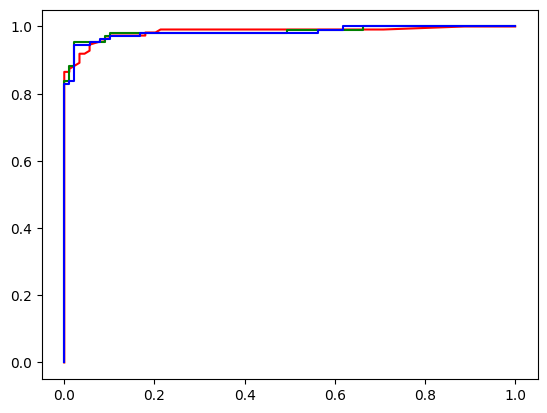

In [47]:
# AUC ROC
# Random Forest
from sklearn.metrics import roc_curve,roc_auc_score, f1_score, accuracy_score

fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test_prep)[:, 1])
plt.plot(fpr, tpr, label='Random Forest', color='red')

# SVC
fpr2, tpr2, thresholds2 = roc_curve(y_test, svc.predict_proba(X_test_prep)[:, 1])
plt.plot(fpr2, tpr2, label='SVC', color='green')

# Logistic Regression
fpr3, tpr3, thresholds3 = roc_curve(y_test, log_reg.predict_proba(X_test_prep)[:, 1])
plt.plot(fpr3, tpr3, label='Logistic Regression', color='blue')
plt.show()

In [48]:
# AUC Score
results = pd.DataFrame({
    'Random Forest': roc_auc_score(y_test, rf.predict_proba(X_test_prep)[:, 1]),
    'SVC': roc_auc_score(y_test, svc.predict_proba(X_test_prep)[:, 1]),
    'Logistic Regression': roc_auc_score(y_test, log_reg.predict_proba(X_test_prep)[:, 1])
}, index=['AUC Score'])
results

,Random Forest,SVC,Logistic Regression
AUC Score,0.984108,0.984918,0.983197


In [57]:
results.loc['F1 Score'] = [f1_score(y_test, rf.predict(X_test_prep)),
                           f1_score(y_test, svc.predict(X_test_prep)),
                         f1_score(y_test, log_reg.predict(X_test_prep))]
results.loc ['Accuracy'] = [accuracy_score(y_test, rf.predict(X_test_prep)),
                            accuracy_score(y_test, svc.predict(X_test_prep)),
                         accuracy_score(y_test, log_reg.predict(X_test_prep))]

In [58]:
results.T

,AUC Score,F1 Score,Accuracy
Random Forest,0.984108,0.946429,0.940
SVC,0.984918,0.953704,0.950
Logistic Regression,0.983197,0.958904,0.955
